In [55]:
"""Regression analysis."""
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [56]:
# Категориальные признаки
# Модель линейной регрессии может включать категориальные признаки

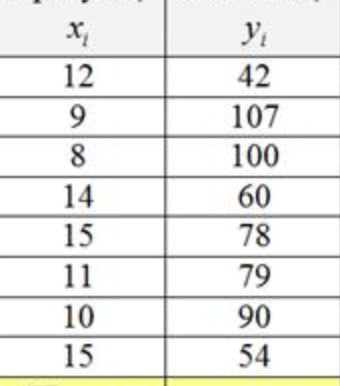

In [ ]:
X_val = np.array([12, 9, 8, 14, 15, 11, 10, 15]).reshape(-1, 1)
# X = np.array([12, 9, 8, 14, 15, 11, 10, 15])
y_val = np.array([42, 107, 100, 60, 78, 79, 90, 54])

model = LinearRegression()

# model.fit?
model.fit(X_val, y_val)

# Каждый элемент находится в списке, будет вектор столбец. Иначе -
# вектор-строка
# array([[12],
#        [ 9],
#        [ 8],
#        [14],
#        [15],
#        [11],
#        [10],
#        [15]])

y_pred = model.predict(X_val)
model.coef_, model.intercept_

(array([-6.04854369]), np.float64(147.3203883495146))

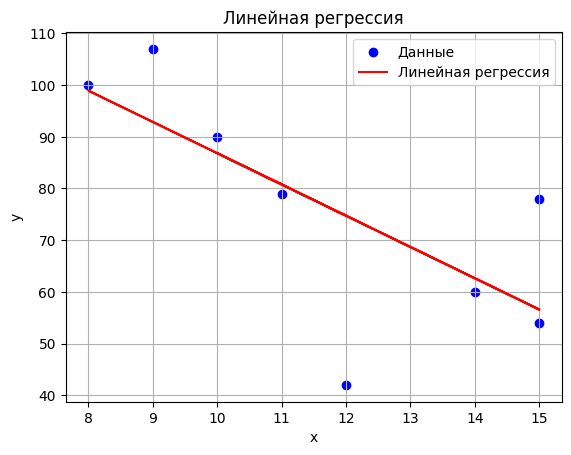

In [58]:
plt.scatter(X_val, y_val, color="blue", label="Данные")
plt.plot(X_val, y_pred, color="red", label="Линейная регрессия")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
corr, p_value = pearsonr(
    X_val.flatten(), y_val
)  # преобразуем X в 1D-массив, если это нужно
print(corr, p_value)

# corr — коэффициент корреляции Пирсона (от -1 до 1)
# p_value — значение p для проверки статистической значимости корреляции

# H0 (нулевая гипотеза): нет линейной корреляции (corr = 0)
# H1 (альтернативная гипотеза): есть линейная корреляция (corr ≠ 0)

# Если p_value < 0.05 → отклоняем H0, корреляция статистически значима

-0.7193069877978742 0.044302594002962915


In [ ]:
r2 = r2_score(y_val, y_pred)
corr**2, r2  # сравниваем r^2 и R^2

# ✔ R^2 (коэффициент детерминации) = r^2 (если модель — простая линейная
# регрессия с 1 переменной)
# ✔ R^2 показывает долю дисперсии y, объясняемую моделью
# ✔ В данном случае: 51% изменчивости успеваемости объясняется количеством
# прогулов
# ✘ Остальные 49% (а не 48%) обусловлены другими факторами (случайными или
# неучтёнными)
# ✔ Чем ближе R^2 к 1 — тем лучше модель приближает реальные данные
# ✔ R^2 ≈ 0 означает, что модель не лучше простого среднего
# ⚠ R^2 < 0 означает, что модель хуже, чем просто предсказывать среднее
# значение y

# Остаточная сумма квадратов (ошибка модели)
SSE = np.sum((y_val - y_pred) ** 2)

# Общая сумма квадратов (отклонение от среднего)
SST = np.sum((y_val - np.mean(y_val)) ** 2)

# Коэффициент детерминации
R2_manual = 1 - SSE / SST
R2_manual

np.float64(0.5174025426948513)